In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/app/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [27]:
comments = pd.read_csv('data/reviews_Grocery_and_Gourmet_Food_5/aspect_Grocery_and_Gourmet_Food_5_reviewsentences.csv', names = ['Chat Aspects'])

In [8]:
pwd

'/log/for_ibm/Subham/AspExt'

In [21]:
comments.head(2)

,Chat Aspects
0,standard milk chocolate kit kat
1,The green tea flavor subtle


In [4]:
comments['Chat Aspects'][0].lower().split()

['standard', 'milk', 'chocolate', 'kit', 'kat']

In [3]:
len(comments)

148750

In [4]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

In [13]:
#stopwords.words('english')

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
c1 = comments['Chat Aspects'][1]
no_punc = [ch for ch in c1 if ch not in string.punctuation]
print(''.join(no_punc))

charge line plan


In [5]:
def CleanUp(sentence):
    #no_punc = [ch for ch in sentence if ch not in string.punctuation]
    #no_punc = [ch if ch not in string.punctuation else ' ' for ch in sentence]
    no_punc = [ch if (ch not in string.punctuation and ch.isdigit()==False) else ' ' for ch in sentence]
    #no_punc = re.sub(' +',' ',''.join(no_punc).lower().strip())
    no_stop = [word for word in no_punc.split() if (word not in stopwords.words('english') and word.isdigit()==False)]
    ps = PorterStemmer()
    stem_word = [ps.stem(word) for word in no_stop]
    return(' '.join(stem_word))

In [36]:
def clean_text(text):
    
    ## Remove puncuation
    text = str(text)
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    ## Stemming
    #text = text.split()
    #stemmer = SnowballStemmer('english')
    #stemmed_words = [stemmer.stem(word) for word in text]
    #text = " ".join(stemmed_words)
    return text

In [93]:
[word for word in 'fe 11 dfa21 as 343 fa  fea sa!'.split() if (word not in stopwords.words('english') and word.isdigit()==False)]


['fe', 'dfa21', 'fa', 'fea', 'sa!']

In [94]:
re.sub(' +', ' ' , ''.join([ch if ch not in string.punctuation else ' ' for ch in 'ASDL/DES D SQS LE: ED QA:ES']))

'ASDL DES D SQS LE ED QA ES'

In [24]:
type(comments['Chat Aspects'])

pandas.core.series.Series

In [37]:
comments_final = comments['Chat Aspects'].map(lambda x: clean_text(x))#.apply(CleanUp)
comments_final = comments_final.dropna()
comments_final.head()

0    standard milk chocolate kit kat
1            green tea flavor subtle
2            among kit kat fans well
3            green tea flavor subtle
4      green tea candies tried still
Name: Chat Aspects, dtype: object

In [8]:
comments_final[2]

'expensive good sea tea fan purchase candy'

In [97]:
comments['Chat Aspects'][2]

"sure 've covered everything"

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [38]:
cv = CountVectorizer()

In [39]:
comments_tf = cv.fit_transform(comments_final)

In [12]:
comments_tf

<89721x21786 sparse matrix of type '<class 'numpy.int64'>'
	with 479903 stored elements in Compressed Sparse Row format>

In [74]:
comments_tf.nnz

454209

In [75]:
comments_final[100]

'concern today'

In [76]:
print(comments_tf[100])

  (0, 1763)	1
  (0, 8811)	1


In [40]:
tfidf = TfidfTransformer()

In [41]:
comments_tfidf = tfidf.fit_transform(comments_tf)

/app/local/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [33]:
comments_tfidf

<89721x21786 sparse matrix of type '<class 'numpy.float64'>'
	with 479903 stored elements in Compressed Sparse Row format>

In [44]:
print(comments_tfidf[100])

  (0, 5783)	0.41990242509054765
  (0, 5465)	0.4861565528837323
  (0, 3971)	0.4798866000477694
  (0, 10940)	0.5975304264938114


In [34]:
cv.vocabulary_

{'standard': 18162,
 'milk': 12146,
 'chocolate': 3937,
 'kit': 10700,
 'kat': 10573,
 'the': 19396,
 'green': 8823,
 'tea': 19165,
 'flavor': 7664,
 'subtle': 18532,
 'among': 1131,
 'fans': 7252,
 'well': 21204,
 'candies': 3252,
 'tried': 20110,
 'but': 2998,
 'still': 18314,
 'best': 2214,
 'kats': 10575,
 've': 20732,
 'ever': 6964,
 'purchased': 15342,
 'different': 5879,
 'curries': 5309,
 'because': 2089,
 'mae': 11553,
 'ploy': 14606,
 'thai': 19351,
 'curry': 5310,
 'paste': 14075,
 'these': 19541,
 'dyes': 6438,
 'create': 5073,
 'awesome': 1725,
 'colors': 4415,
 'couple': 4951,
 'drops': 6342,
 'really': 15655,
 'vibrant': 20835,
 'color': 4406,
 'natural': 12761,
 'organic': 13581,
 'wish': 21403,
 'nice': 12912,
 'basic': 2004,
 'selection': 16968,
 'gel': 8364,
 'food': 7868,
 'colorings': 4413,
 'product': 15116,
 'seems': 16952,
 'high': 9353,
 'quality': 15423,
 'energy': 6742,
 'bar': 1929,
 'better': 2224,
 'average': 1700,
 'tasting': 19120,
 'sports': 18047,
 'sn

In [17]:
tfidf.idf_[cv.vocabulary_['account']]

11.018176918839586

In [19]:
from sklearn.cluster import KMeans

In [22]:
km = KMeans(n_clusters=5)

In [23]:
km.fit_predict(comments_tfidf)

array([2, 2, 3, ..., 2, 0, 2], dtype=int32)

In [56]:
km.labels_

array([ 3,  3,  8,  0,  8,  0,  8,  5,  3, 13,  9,  3, 11, 14, 14,  9,  3,
        9, 12, 13, 13, 13, 11, 12,  5,  5,  3, 10,  3, 14, 12,  0,  1,  1,
        0,  1, 11, 11, 14, 14,  3,  1, 11, 11,  3, 11, 14, 10,  3, 10, 14,
       14, 14, 12, 12, 10, 14,  3, 12,  3,  8,  8,  8,  3,  3, 10,  3,  5,
        5, 10,  3,  3,  3, 10, 13, 13, 13, 10,  9, 11, 11,  6,  6, 13, 13,
        9, 10, 13, 13, 13,  9, 13,  9,  5,  5,  5,  5, 12, 11, 14,  3,  3,
        3,  3,  9,  3,  3,  3, 12, 12, 11,  3,  3,  3, 11,  3, 11, 11, 10,
       10,  1, 13,  1,  1,  1,  1,  1, 12,  3,  3,  5,  5,  6,  6,  9,  4,
        4,  4,  4,  4,  1,  9, 12, 10, 12, 12,  8, 12, 10,  3,  9, 11,  8,
       12,  3,  3, 12,  4,  4,  4,  3, 12, 12,  3, 14, 14, 14, 14, 10,  7,
       12, 12,  3, 10,  4,  4,  3,  4,  4,  4,  3, 11,  3,  3,  3,  3,  5,
       12,  5,  3, 12, 11, 12,  3, 10, 10,  3,  3, 11, 10, 10, 11, 10, 10,
       10, 10, 10, 10,  3, 10,  7, 11, 11, 12,  8, 11,  3, 13, 13, 13,  3,
        3, 13, 13, 13, 13

In [86]:
km.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [25]:
len(comments['Chat Aspects']), len(comments_final), len(pd.Series(km.labels_))

(148750, 148750, 148750)

In [24]:
res = pd.concat([comments['Chat Aspects'], comments_final, pd.Series(km.labels_)], axis = 1)
res.to_csv("data/reviews_Grocery_and_Gourmet_Food_5/5ncluster2.csv")
#writer = pd.ExcelWriter('.xlsx')
#res.to_excel(writer,'Sheet1')
#writer.save()

In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [24]:
#word_tokenize('Asking to ask about what he asked')

In [50]:
km.score(comments_tfidf)

NameError: name 'km' is not defined

In [20]:
k_list = np.arange(1, 30)
score_list = [KMeans(n_clusters=i).fit(comments_tfidf).score(comments_tfidf) for i in np.arange(1,30)]

ValueError: x and y must have same first dimension, but have shapes (29,) and (8,)

/app/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


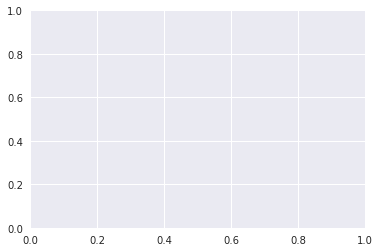

In [43]:
#Elbow
plt.plot(k_list, [89184.63276157087, 88761.0356569304, 88179.01512385489, 87800.89757318857, 87468.82142323242, 87223.67275584262, 86974.23196147353, 86775.06905827437])  # No elbow :(

In [195]:
km.score()

TypeError: score() missing 1 required positional argument: 'X'

# WCSS

In [44]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 2)
    kmeans.fit(comments_tfidf)
    wcss.append(kmeans.inertia_)
    print(wcss)

[89184.63276157087]
[89184.63276157087, 88761.0356569304]


KeyboardInterrupt: 